In [1]:
# %% imports
# libraries
import torch
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# local imports
import Fast_MRI_dataloader
# import autoencoder_template
from matplotlib import pyplot as plt
from Fast_MRI_dataloader import create_dataloaders

In [3]:
### prepare the datasets
# get dataloader
# define parameters
data_loc = os.getcwd()
print(data_loc)
data_loc = data_loc + '\Fast_MRI_Knee'
batch_size = 64
train_loader, test_loader = create_dataloaders(data_loc, batch_size)

c:\Users\Jexel\Documents\Yexel Files Documents\TUE Complete\WTB\Jaar 2 AIESW\Kwartiel 4\5LSL0 Machine learning for signal processing\Assignment\5LSL0-1\Assignment 4


# Week 2

### Exercise 3 - MRI helper functions

#### (a) [2pt]Create a Python function that, given an MRI image, calculates the K-space.
Make sure to only use PyTorch functions and that the function can work on multiple
images in parallel. Visualize a ground truth image with its accompanying full k-space
measurement.
hint: make sure that the DC (i.e., 0 Hz component) is at the center of the image.
Moreover, plotting the log of the absolute value of the k-space provides better contrast.

In [6]:
# iter(train_loader)
# get some examples
examples = enumerate(test_loader)
 # go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    # M = measurement Mask
    # k-space = FFT(img)
    # gt = X = groundtruth
    continue

# _, (x_clean_example, x_noisy_example, labels_example) = next(examples)

100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


In [30]:
# atorch.fft.fft2(inpu
def K_space(X):
    ''' Return the K-space of an input image:
        Arguments:
        ---------------------
        X: torch.Tensor (default: -)

        Returns:
        ---------------------------
        KS: torch.Tensor
    '''
    # KS = torch.log(torch.abs(torch.fft.fftshift(torch.fft.fft2(gt)))) 
    KS = torch.fft.fftshift(torch.fft.fft2(gt))
    return KS

In [34]:
x1 =K_space(gt)

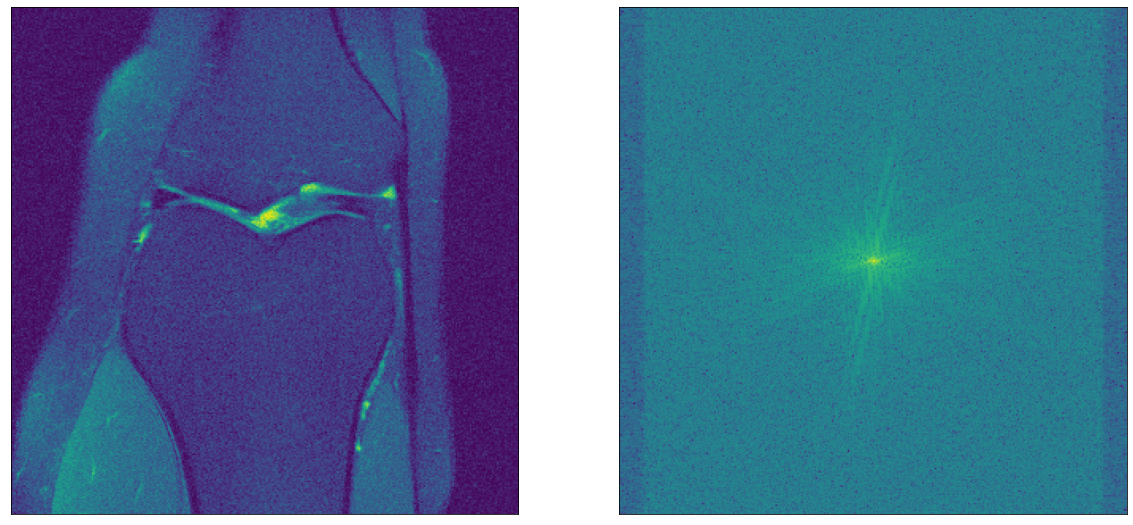

In [36]:
# kp,m,gt = next(iter(test_loader))
# gt_kspace = kspace(gt)
# gt_kspace_plt = torch.log(torch.abs(gt_kspace))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(gt[1,:,:])
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(torch.log(torch.abs(x1[1,:,:])))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

#### (b) [1pt]Create a Python function that, given a full k-space and measurement matrix, calculates the partial k-space.

In [39]:
a = torch.randn(2,2)
b = torch.randn(2,2)
print(a)
print(b)

tensor([[-0.7821, -1.0146],
        [ 0.0410,  0.3220]])
tensor([[ 0.6391, -0.4801],
        [-0.4117, -0.1304]])


In [41]:
print(a * b) # element wise
print(torch.matmul(a,b)) # matrix wise (row*column)

tensor([[-0.4999,  0.4871],
        [-0.0169, -0.0420]])
tensor([[-0.0822,  0.5078],
        [-0.1064, -0.0617]])


In [91]:
def partial_K_space(X,Mask):
    '''
    Given a full-K-space image, return a partial K-space image based on the measurement mask

    Arguments:
    X: torch.tensor() (default: -)
        Full K-space image
    Mask: torch.tensor() (default: -)
        Measurement mask (consisting of only 1's & 0's)
    
    return
    ---------
    part_k_space: torch.tensor()
    '''
    PKS = X*Mask
    return PKS

#### (c) [2pt]Create a Python function that, given a partial k-space, calculates the accelerated measurement image. Visualize a partial k-space with its accompanying accelerated MRI.

In [92]:
def acc_img(X):
    '''
    Given the partial k_space image X, calculate the accelerated measurement image:

    Arguments:
    ----------------
    X: torch.tensor()

    returns:
    --------------
    Y: torch.tensor()
    '''
    Y = torch.fft.ifft2(torch.fft.ifftshift(X))
    return Y

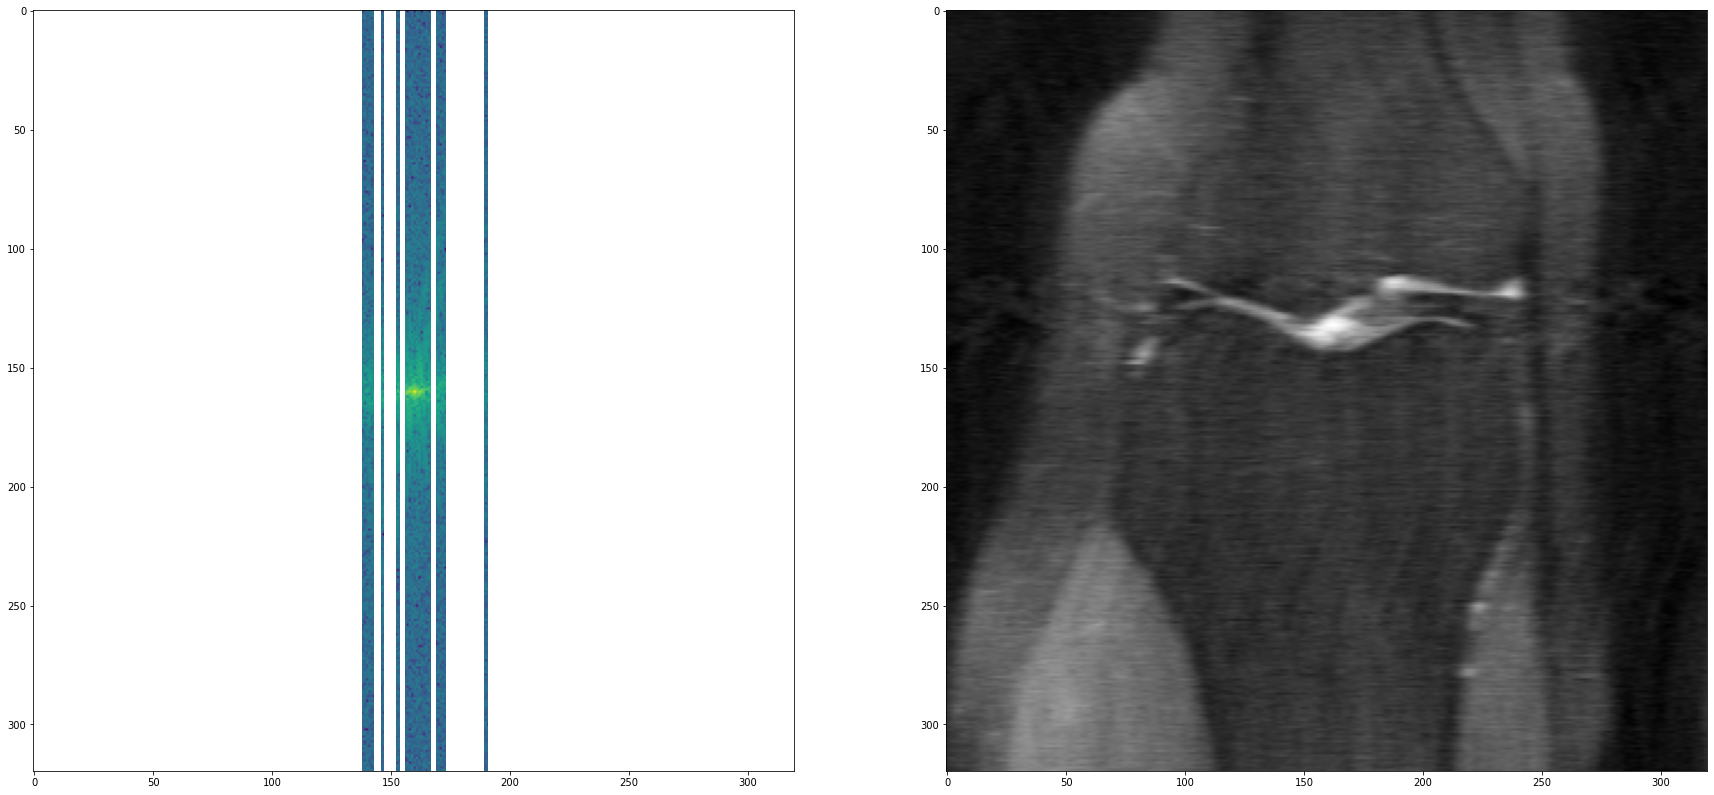

In [93]:
x1 =K_space(gt)
x2 =partial_K_space(x1,M)
x3 = acc_img(x2)
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
plt.imshow(torch.log(torch.abs(x2[1,:,:])))

plt.subplot(1,2,2)
plt.imshow(torch.abs(x3[1,:,:]), cmap='gray')

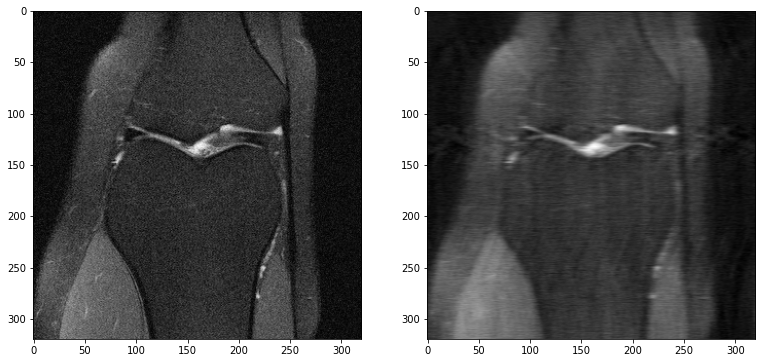

In [86]:
x1 =K_space(gt)
x2 =partial_K_space(x1,M)
x4 = acc_img(x2)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(gt[1,:,:],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(torch.abs(x3[1,:,:]),cmap='gray')

# plt.xticks([])
# plt.yticks([])

#### (d) [1pt] Recreate the pipeline image shown above for a different MRI image.
hint: for the best result, use the same ’vmin’ and ’vmax’ for the full and partial k-space
images.

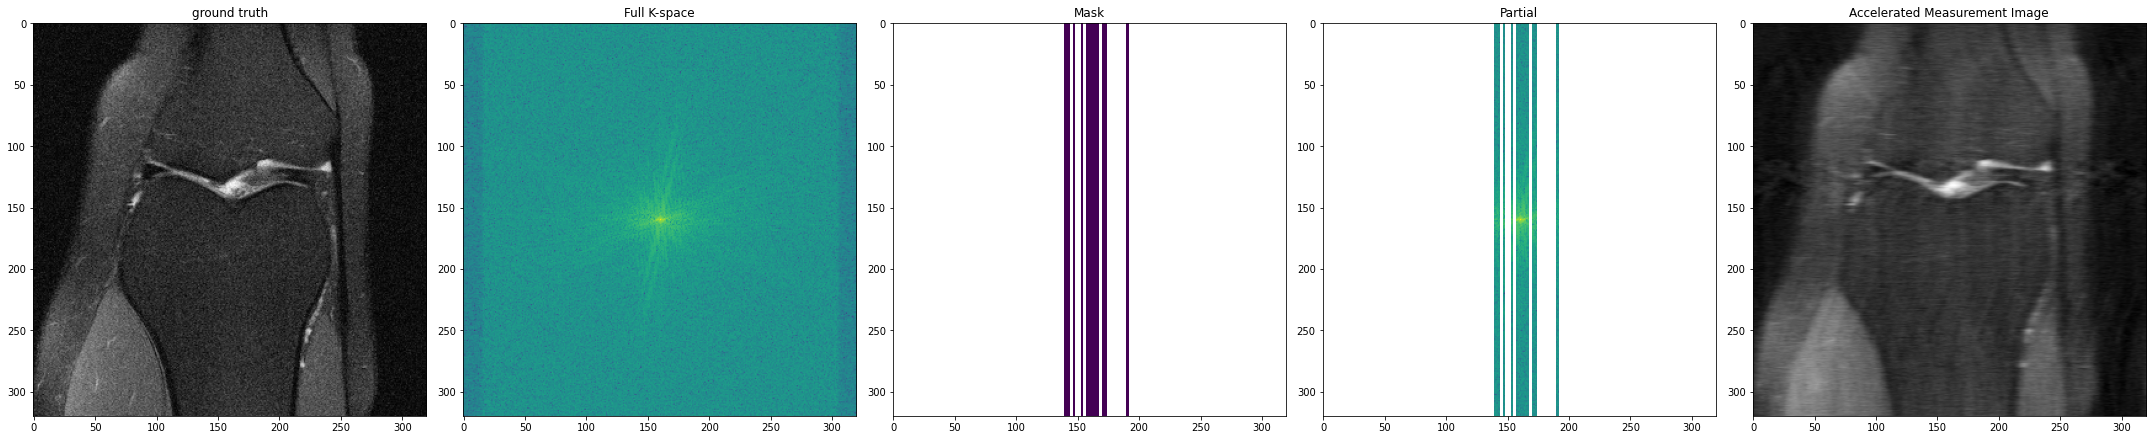

In [97]:
x1 =K_space(gt)
x2 =partial_K_space(x1,M)
x3 = acc_img(x2)
### vmin and vman
vmin = torch.min(torch.log(torch.abs(x1)))
vmax = torch.max(torch.log(torch.abs(x1)))

plt.figure(figsize=(30,50))

plt.subplot(1,5,1)
plt.imshow(gt[1,:,:],cmap='gray')
plt.title('ground truth')

plt.subplot(1,5,2)
plt.imshow(torch.log(torch.abs(x1[1,:,:])), vmin=vmin,vmax=vmax)
plt.title('Full K-space')

plt.subplot(1,5,3)
plt.imshow(torch.log(torch.abs(M[1,:,:])))
plt.title('Mask')

plt.subplot(1,5,4)
plt.imshow(torch.log(torch.abs(x2[1,:,:])),  vmin=vmin,vmax=vmax)
plt.title('Partial')

plt.subplot(1,5,5)
plt.imshow(torch.abs(x3[1,:,:]),cmap='gray')
plt.title('Accelerated Measurement Image')
plt.tight_layout()


#### (e) [1pt] In the accelerated MRI image it looks as though the same image is overlayed several times, what is this effect called, and why does it only happen in the horizontal direction?